# Problem Statement

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we have to predict the final price of each home.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
train_df = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Plotting ScatterPlot between numerical features and SalePrice 

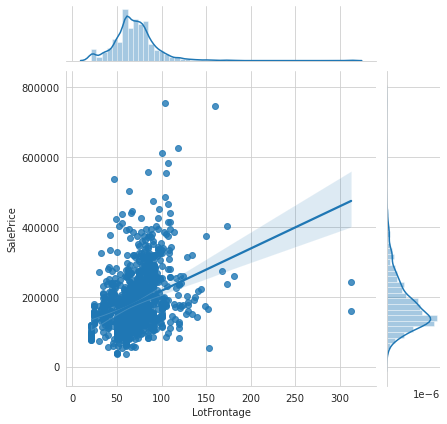

In [4]:
sns.set_style('whitegrid')
sns.jointplot(train_df['LotFrontage'], train_df['SalePrice'], kind = 'reg')

### Detecting outliers and eliminating them

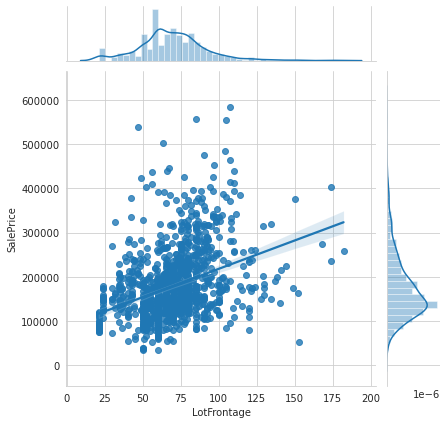

In [5]:
train_df = train_df.drop(train_df[(train_df['LotFrontage']>200) & (train_df['SalePrice']<300000)].index).reset_index(drop=True)
train_df = train_df.drop(train_df[(train_df['LotFrontage']<200) & (train_df['SalePrice']>600000)].index).reset_index(drop=True)
sns.jointplot(train_df['LotFrontage'], train_df['SalePrice'], kind = 'reg')

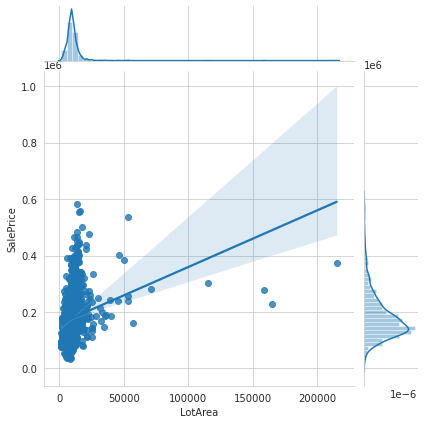

In [6]:
sns.jointplot(train_df['LotArea'], train_df['SalePrice'], kind = 'reg')

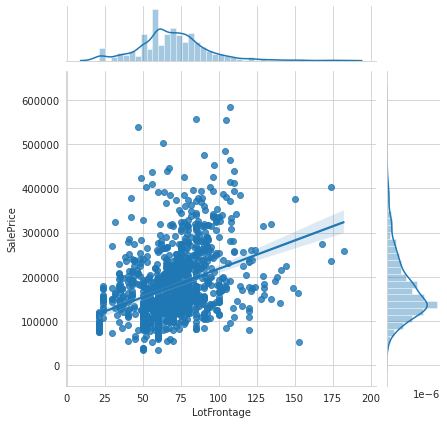

In [7]:
train_df = train_df.drop(train_df[(train_df['LotArea']>50000) & (train_df['SalePrice']<0.6)].index).reset_index(drop=True)
sns.jointplot(train_df['LotFrontage'], train_df['SalePrice'], kind = 'reg')

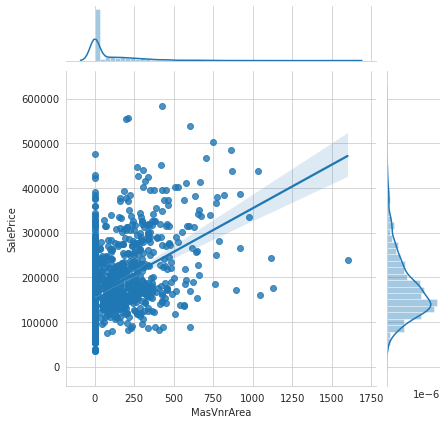

In [8]:
sns.jointplot(train_df['MasVnrArea'], train_df['SalePrice'], kind = 'reg')

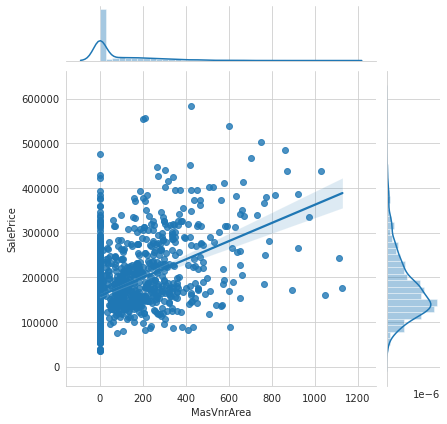

In [9]:
train_df = train_df.drop(train_df[(train_df['MasVnrArea']>1500) & (train_df['SalePrice']<300000)].index).reset_index(drop=True)
sns.jointplot(train_df['MasVnrArea'], train_df['SalePrice'], kind = 'reg')

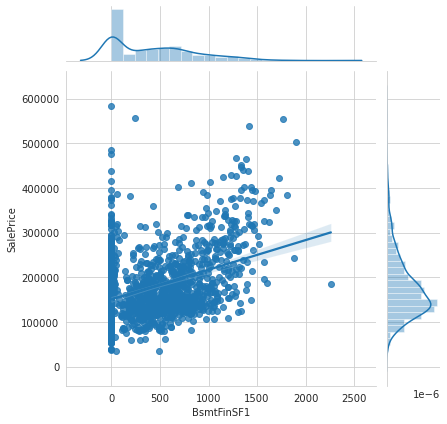

In [10]:
sns.jointplot(train_df['BsmtFinSF1'], train_df['SalePrice'], kind = 'reg')

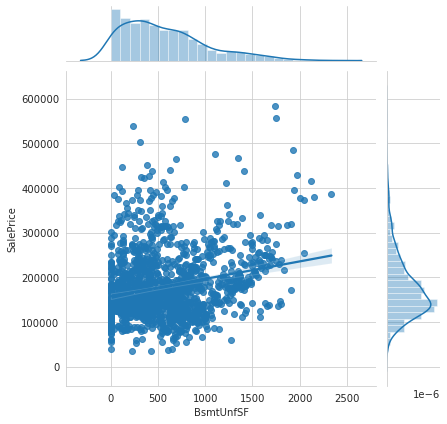

In [11]:
sns.jointplot(train_df['BsmtUnfSF'], train_df['SalePrice'], kind = 'reg')

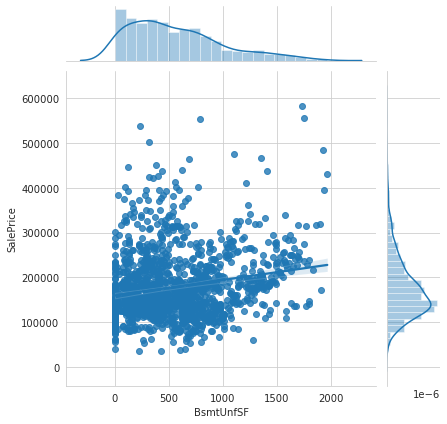

In [12]:
train_df = train_df.drop(train_df[(train_df['BsmtUnfSF']>2000) & (train_df['SalePrice']<500000)].index).reset_index(drop=True)
sns.jointplot(train_df['BsmtUnfSF'], train_df['SalePrice'], kind = 'reg')

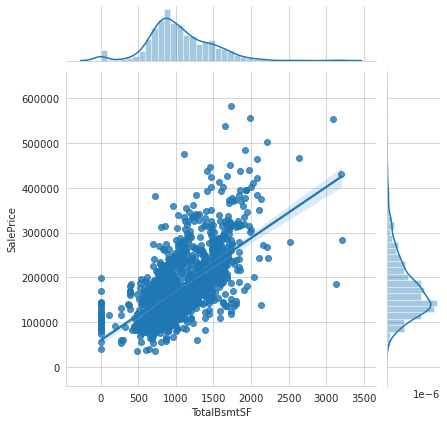

In [13]:
sns.jointplot(train_df['TotalBsmtSF'], train_df['SalePrice'], kind = 'reg')

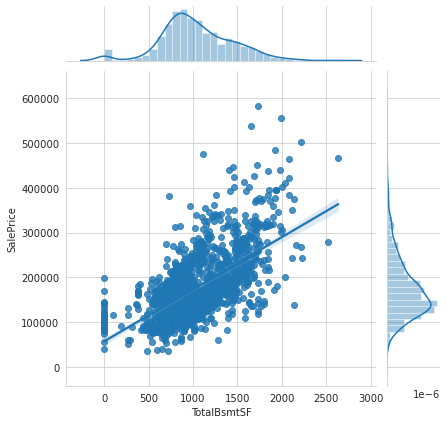

In [14]:
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>3000) & (train_df['SalePrice']<600000)].index).reset_index(drop=True)
sns.jointplot(train_df['TotalBsmtSF'], train_df['SalePrice'], kind = 'reg')

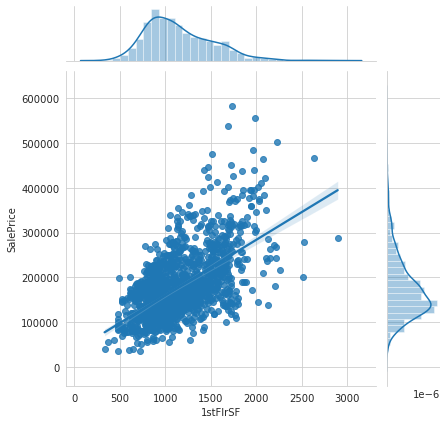

In [15]:
sns.jointplot(train_df['1stFlrSF'], train_df['SalePrice'], kind = 'reg')

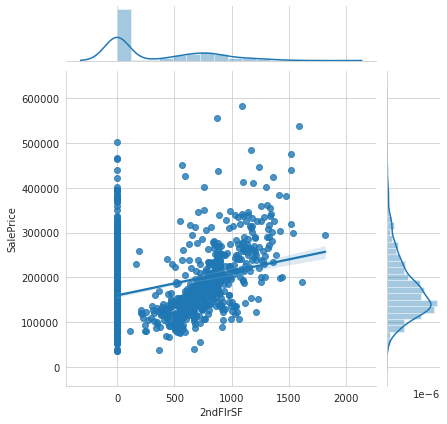

In [16]:
sns.jointplot(train_df['2ndFlrSF'], train_df['SalePrice'], kind = 'reg')

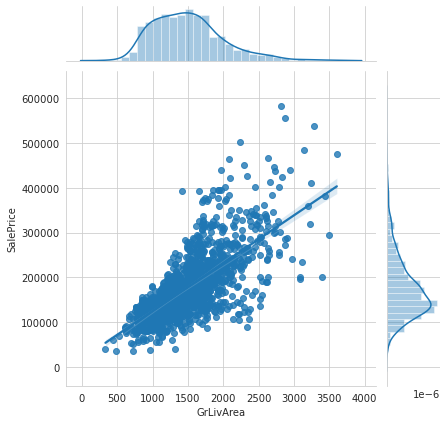

In [17]:
sns.jointplot(train_df['GrLivArea'], train_df['SalePrice'], kind = 'reg')

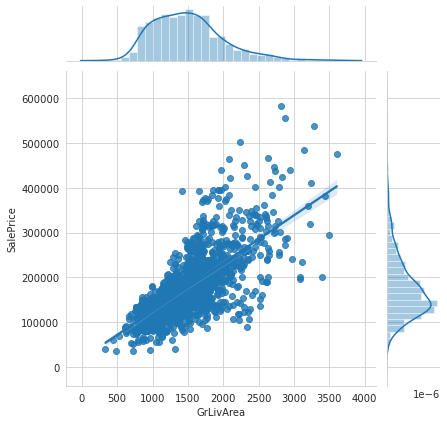

In [18]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<200000)].index).reset_index(drop=True)
sns.jointplot(train_df['GrLivArea'], train_df['SalePrice'], kind = 'reg')

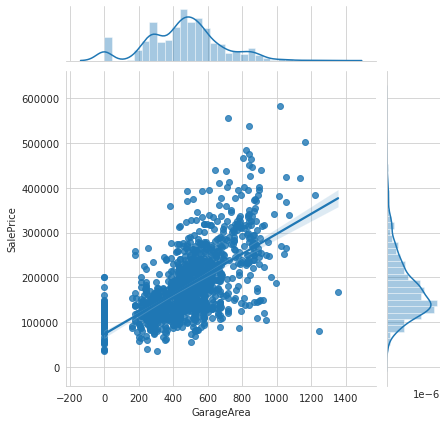

In [19]:
sns.jointplot(train_df['GarageArea'], train_df['SalePrice'], kind = 'reg')

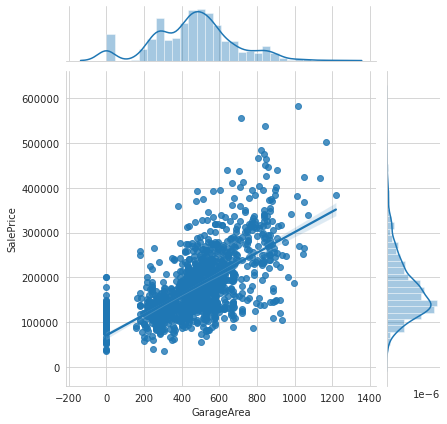

In [20]:
train_df = train_df.drop(train_df[(train_df['GarageArea']>=1200) & (train_df['SalePrice']<300000)].index).reset_index(drop=True)
sns.jointplot(train_df['GarageArea'], train_df['SalePrice'], kind = 'reg')

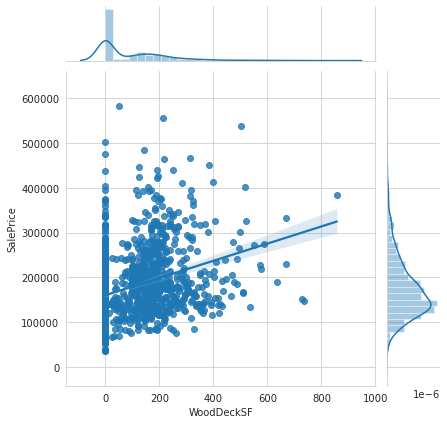

In [21]:
sns.jointplot(train_df['WoodDeckSF'], train_df['SalePrice'], kind = 'reg')

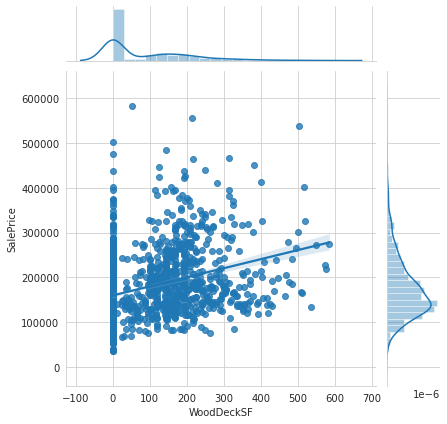

In [22]:
train_df = train_df.drop(train_df[(train_df['WoodDeckSF']>=600) & (train_df['SalePrice']<400000)].index).reset_index(drop=True)
sns.jointplot(train_df['WoodDeckSF'], train_df['SalePrice'], kind = 'reg')

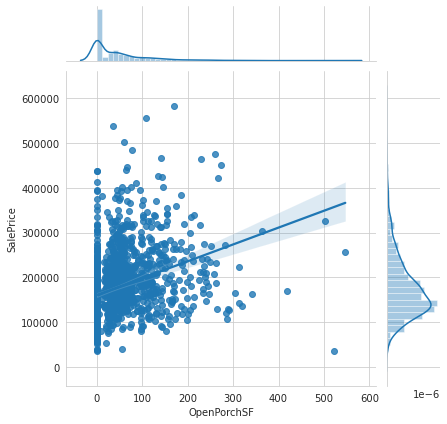

In [23]:
sns.jointplot(train_df['OpenPorchSF'], train_df['SalePrice'], kind = 'reg')

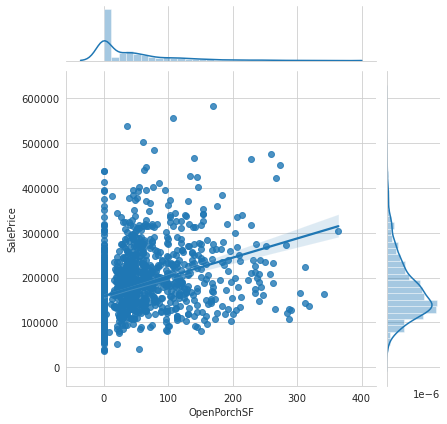

In [24]:
train_df = train_df.drop(train_df[(train_df['OpenPorchSF']>=400) & (train_df['SalePrice']<400000)].index).reset_index(drop=True)
sns.jointplot(train_df['OpenPorchSF'], train_df['SalePrice'], kind = 'reg')

In [25]:
print(train_df.shape)
print(test.shape)

(1431, 81)
(1459, 80)


In [26]:
ntrain = train_df.shape[0]
ntest = test.shape[0]
y_train = train_df['SalePrice']

## Concatinating train and test data

In [27]:
df = pd.concat([train_df,test])
df.drop('SalePrice', axis=1, inplace=True)

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Exploring Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2890 non-null   int64  
 1   MSSubClass     2890 non-null   int64  
 2   MSZoning       2886 non-null   object 
 3   LotFrontage    2407 non-null   float64
 4   LotArea        2890 non-null   int64  
 5   Street         2890 non-null   object 
 6   Alley          196 non-null    object 
 7   LotShape       2890 non-null   object 
 8   LandContour    2890 non-null   object 
 9   Utilities      2888 non-null   object 
 10  LotConfig      2890 non-null   object 
 11  LandSlope      2890 non-null   object 
 12  Neighborhood   2890 non-null   object 
 13  Condition1     2890 non-null   object 
 14  Condition2     2890 non-null   object 
 15  BldgType       2890 non-null   object 
 16  HouseStyle     2890 non-null   object 
 17  OverallQual    2890 non-null   int64  
 18  OverallC

## Finding Missing Values

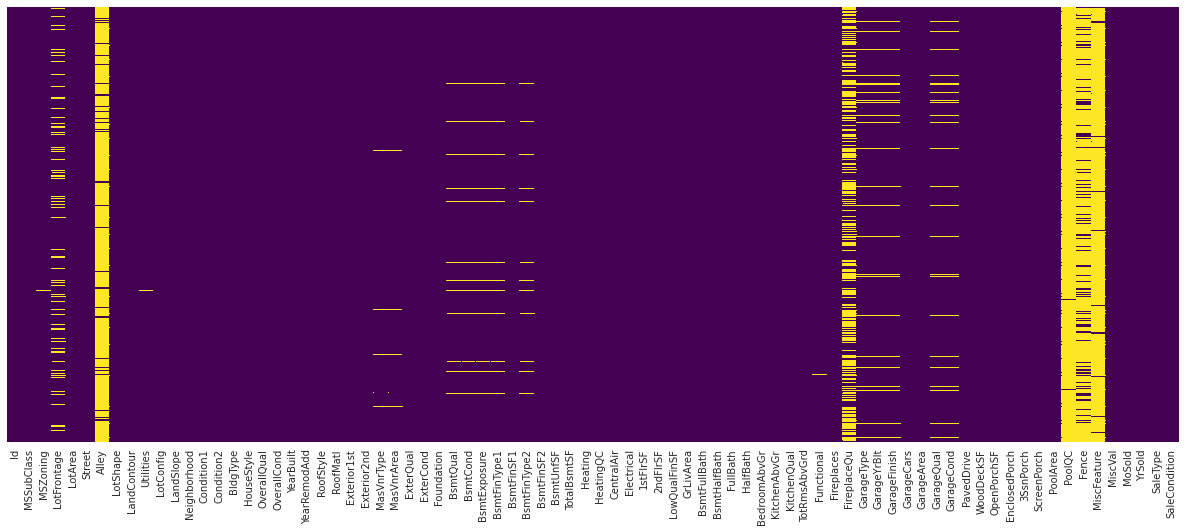

In [30]:
plt.figure(figsize=(21,8))
sns.set_style('whitegrid')
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

In [31]:
feature_with_na_values = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_with_na_values:
    print(feature, np.round(df[feature].isnull().mean(),4), '% of missing value')

MSZoning 0.0014 % of missing value
LotFrontage 0.1671 % of missing value
Alley 0.9322 % of missing value
Utilities 0.0007 % of missing value
MasVnrType 0.0083 % of missing value
MasVnrArea 0.008 % of missing value
BsmtQual 0.028 % of missing value
BsmtCond 0.0284 % of missing value
BsmtExposure 0.0284 % of missing value
BsmtFinType1 0.0273 % of missing value
BsmtFinType2 0.0273 % of missing value
BsmtFullBath 0.0007 % of missing value
BsmtHalfBath 0.0007 % of missing value
Functional 0.0007 % of missing value
FireplaceQu 0.4903 % of missing value
GarageType 0.054 % of missing value
GarageYrBlt 0.0547 % of missing value
GarageFinish 0.0547 % of missing value
GarageQual 0.0547 % of missing value
GarageCond 0.0547 % of missing value
PoolQC 0.9972 % of missing value
Fence 0.8042 % of missing value
MiscFeature 0.9651 % of missing value


### Removing variables have greater than 70% of missing values

In [32]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(df.shape)

(2890, 76)


### Treating categorical and numerical features differently

In [33]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

39

In [34]:
numerical_features = [feature for feature in df.columns if feature not in categorical_features]
len(numerical_features)

37

In [35]:
categorical_feature_with_na_values = [feature for feature in categorical_features if df[feature].isnull().sum()>1]
len(categorical_feature_with_na_values)

14

In [36]:
numerical_feature_with_na_values = [feature for feature in numerical_features if df[feature].isnull().sum()>1]
len(numerical_feature_with_na_values)

5

In [37]:
for col in categorical_feature_with_na_values:
    print(df[col].value_counts())

RL         2242
RM          457
FV          138
RH           26
C (all)      23
Name: MSZoning, dtype: int64
AllPub    2887
NoSeWa       1
Name: Utilities, dtype: int64
None       1728
BrkFace     870
Stone       243
BrkCmn       25
Name: MasVnrType, dtype: int64
TA    1276
Gd    1200
Ex     245
Fa      88
Name: BsmtQual, dtype: int64
TA    2577
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
No    1892
Av     415
Gd     264
Mn     237
Name: BsmtExposure, dtype: int64
Unf    842
GLQ    837
ALQ    426
Rec    287
BLQ    266
LwQ    153
Name: BsmtFinType1, dtype: int64
Unf    2469
Rec     104
LwQ      86
BLQ      67
ALQ      51
GLQ      34
Name: BsmtFinType2, dtype: int64
Typ     2690
Min2      70
Min1      65
Mod       34
Maj1      18
Maj2       9
Sev        2
Name: Functional, dtype: int64
Gd    728
TA    585
Fa     74
Po     46
Ex     40
Name: FireplaceQu, dtype: int64
Attchd     1703
Detchd      775
BuiltIn     183
Basment      36
2Types       22
CarPort      15
Name: Gar

## Filling the missing values

FireplaceQu : data description says NA means "no fireplace"

In [38]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None as there may be no garage in the house

In [39]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [40]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it

In [41]:
df = df.drop(['Utilities'], axis=1)

Filling value for MasVnrType and MSZoning with most repeated values

In [42]:
for col in ('MSZoning', 'MasVnrType','Functional'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [43]:
print(numerical_feature_with_na_values)

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']


LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.

In [44]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

MasVnrArea : NA most likely means no masonry veneer for these houses. We can fill 0 for the area

In [45]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [46]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [47]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(df[col].mode()[0])

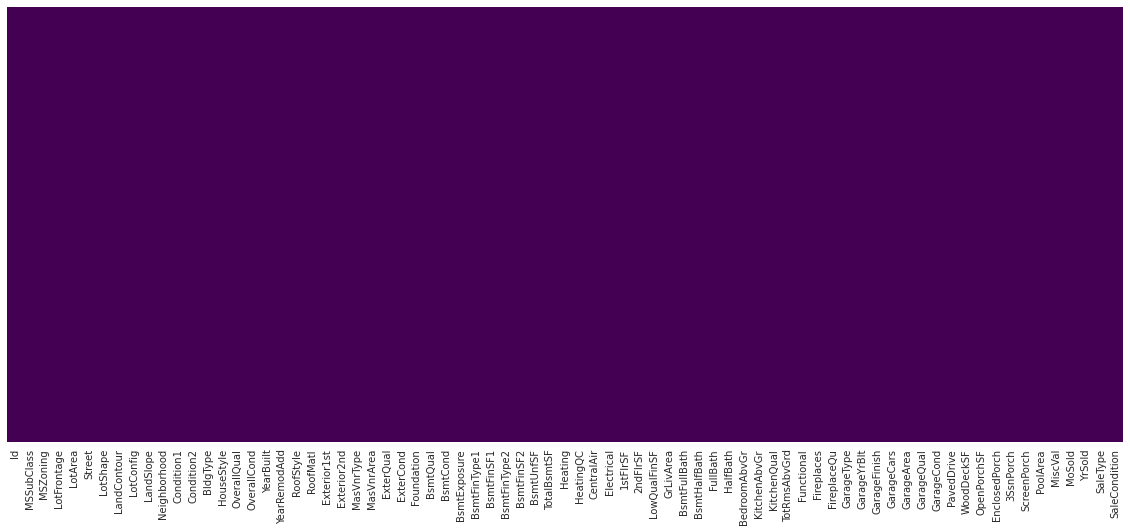

In [48]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

**Dealing with features containing Years**

As YearSold feature doesn't impact on SalePrice but the difference between the other features containg years data and YearSold will have huge impact. So, we changed our features according to that

In [49]:
year_features = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
print(year_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [50]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = (df['YrSold'].astype(int) - df[feature]).astype('int')
df[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5,2008
1,31,31,31,2007
2,7,6,7,2008
3,91,36,8,2006
4,8,8,8,2008


In [51]:
for feature in numerical_features:
    print(feature, df[feature].nunique())

Id 2890
MSSubClass 16
LotFrontage 129
LotArea 1929
OverallQual 10
OverallCond 9
YearBuilt 127
YearRemodAdd 63
MasVnrArea 434
BsmtFinSF1 981
BsmtFinSF2 270
BsmtUnfSF 1125
TotalBsmtSF 1042
1stFlrSF 1067
2ndFlrSF 628
LowQualFinSF 36
GrLivArea 1274
BsmtFullBath 4
BsmtHalfBath 3
FullBath 5
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 14
Fireplaces 5
GarageYrBlt 111
GarageCars 6
GarageArea 595
WoodDeckSF 371
OpenPorchSF 246
EnclosedPorch 182
3SsnPorch 31
ScreenPorch 119
PoolArea 12
MiscVal 36
MoSold 12
YrSold 5


In [52]:
print(df['MSSubClass'].nunique())
print(df['OverallCond'].nunique())
print(df['MoSold'].nunique())
print(df['YrSold'].nunique())

16
9
12
5


As seen above these numerical features are actually categorical features

In [53]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] =df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [54]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [55]:
df.drop(['2ndFlrSF','TotalBsmtSF','1stFlrSF'],axis=1,inplace=True)
df.shape

(2890, 73)

In [56]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (2890, 73)


## Checking Skewness

In [57]:
from scipy.stats import norm, skew
numeric_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_feat.remove('Id')
skewed_feat = df[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' :skewed_feat})
skewness.head(10)

,Skew
MiscVal,21.909603
PoolArea,18.620774
LotArea,13.331676
LowQualFinSF,12.027394
3SsnPorch,11.318149
LandSlope,4.992111
KitchenAbvGr,4.277477
BsmtFinSF2,4.159885
EnclosedPorch,4.001519
BsmtHalfBath,3.922804


### Using BoxCox Transformation

In [58]:
skewness = skewness[abs(skewness) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewness.index
lamda = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat],lamda)

In [59]:
df = pd.get_dummies(df)
print(df.shape)

(2890, 214)


In [60]:
df.sort_values(by = 'Id')
train_df = df[:ntrain]
test_df = df[ntrain:]
print('Shape of Train Data :' + str(train_df.shape))
print('Shape of Test Data :' + str(test_df.shape))

Shape of Train Data :(1431, 214)
Shape of Test Data :(1459, 214)


## Defining features and target variable

In [61]:
X = train_df.drop(['Id'],axis=1)
y = y_train

In [62]:
X.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.540963,0.0,2.440268,1.820334,2.055642,2.055642,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,1.540963,0.0,2.259674,2.440268,4.545286,4.545286,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.000000,0.0,2.440268,1.820334,2.440268,2.259674,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.000000,0.0,2.440268,1.820334,6.469750,4.792130,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.000000,0.0,2.602594,1.820334,2.602594,2.602594,...,0,0,0,1,0,0,0,0,1,0


## Splitting X into X_train and X_test

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [64]:
X_train.shape

(1287, 213)

## Applying XGBOOST Regressor

In [65]:
xg = xgboost.XGBRegressor()
param_grid = dict(learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], max_depth = [3,4,5,6,8,10,12,15],
                 min_child_weight = [1,3,5,7], gamma = [0.0,0.1,0.2,0.3,0.4], colsample_bytree = [0.3,0.4,0.5,0.6])
grid_xg = RandomizedSearchCV(xg, param_grid, cv=10, scoring = 'r2')
grid_xg.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n...
                                          verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.3, 0.4,

In [66]:
print(grid_xg.best_score_)
print(grid_xg.best_params_)

0.911253659094825
{'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.3}


In [67]:
y_pred_train = grid_xg.predict(X_train)
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

0.9613269746256586
204905406.19075805


In [68]:
y_pred_test = grid_xg.predict(X_test)
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

0.9344185213257821
355377479.23561054


## Predicting test file data

In [69]:
y_pred_xg = grid_xg.predict(test_df.drop('Id',axis=1))
y_pred = pd.DataFrame(y_pred_xg, columns=["SalePrice"])
sub = pd.concat([test_df['Id'].astype(int), y_pred], axis=1)
sub.to_csv("submission3.csv", index=False)

## Do UPVOTE if you like it :)